In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
df1 = pd.read_csv('pf10xIDC_pheno.csv')
df2 = pd.read_csv('allgenes_norm.csv')


feature_names = df2.iloc[:, 0].tolist()

df2 = df2.drop(df2.columns[0], axis=1)
# feature_names
df2



,AAACCTGAGCCTCGTG.1,AAACCTGAGCCTTGAT.1,AAACCTGAGCTCCTTC.1,AAACCTGAGGACATTA.1,AAACCTGCAAGACGTG.1,AAACCTGCATGTCCTC.1,AAACCTGGTATATGGA.1,AAACCTGGTTTACTCT.1,AAACCTGTCAACACGT.1,AAACCTGTCCAAATGC.1,...,TTTGGTTGTTATCCGA.1,TTTGGTTTCAGTTGAC.1,TTTGGTTTCCGTAGTA.1,TTTGTCAAGCCAGTTT.1,TTTGTCAAGTCACGCC.1,TTTGTCACATATACCG.1,TTTGTCACATCATCCC.1,TTTGTCAGTTAAGACA.1,TTTGTCATCAACACGT.1,TTTGTCATCAACCATG.1
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.168589,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5062,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5063,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5064,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X = []
for (columnName, columnData) in df2.iteritems():
    X.append(columnData.values.tolist())
Y = df1.bulk
len(Y)

6737

In [8]:
df = pd.DataFrame(X, columns = feature_names)

In [9]:
# x = df.values.tolist()
# print(x == X)

In [10]:
df['bulk'] = Y

In [11]:
mcc = make_scorer(matthews_corrcoef)

In [12]:
x = df.drop(['bulk'], axis=1)

In [13]:
x

,PF3D7-1400200,PF3D7-1400700,PF3D7-1401100,PF3D7-1401200,PF3D7-1401300,PF3D7-1401400,PF3D7-1401500,PF3D7-1401600,PF3D7-1401700,PF3D7-1401800,...,PF3D7-0113800,PF3D7-0113900,PF3D7-0114000,PF3D7-0114500,PF3D7-0115000,PF3D7-0115100,PF3D7-0115300,PF3D7-0115400,PF3D7-0115600,PF3D7-0115700
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.168589,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6732,0.0,0.0,0.0,0.000000,0.0,4.410381,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6733,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6734,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.248317,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6735,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
y = df['bulk']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify = y)
X_train
Y_test
str = 'PF3D7-1401400 PF3D7-1404000 PF3D7-1404500 PF3D7-1406900 PF3D7-1409800 PF3D7-1411400 PF3D7-1415600 PF3D7-1417000 PF3D7-1420700 PF3D7-1421900 PF3D7-1422000 PF3D7-1422700 PF3D7-1426300 PF3D7-1426900 PF3D7-1429700 PF3D7-1430300 PF3D7-1432900 PF3D7-1433500 PF3D7-1433700 PF3D7-1437700 PF3D7-1439600 PF3D7-1441000 PF3D7-1441100 PF3D7-1441700 PF3D7-1444000 PF3D7-1445500 PF3D7-1447500 PF3D7-1448800 PF3D7-1449000 PF3D7-1449200 PF3D7-1451100 PF3D7-1451600 PF3D7-1455500 PF3D7-1455700 PF3D7-1455800 PF3D7-1457100 PF3D7-1460000 PF3D7-1460900.2 PF3D7-1462200 PF3D7-1464200 PF3D7-1464900 PF3D7-1465400 PF3D7-1466300 PF3D7-1467700 PF3D7-1468000 PF3D7-1468400 PF3D7-1469100 PF3D7-1470300 PF3D7-1470700 PF3D7-1471200 PF3D7-1475300 PF3D7-1476100 PF3D7-1301500 PF3D7-1301600 PF3D7-1301700 PF3D7-1304000 PF3D7-1305000 PF3D7-1305300 PF3D7-1306000 PF3D7-1307400 PF3D7-1307600 PF3D7-1307800 PF3D7-1308500 PF3D7-1309700 PF3D7-1309800 PF3D7-1311200 PF3D7-1311400 PF3D7-1311900 PF3D7-1312500 PF3D7-1315700 PF3D7-1317300 PF3D7-1318700 PF3D7-1321800 PF3D7-1322100 PF3D7-1322900 PF3D7-1323600 PF3D7-1324900 PF3D7-1328100 PF3D7-1328900 PF3D7-1329600 PF3D7-1334000 PF3D7-1335700 PF3D7-1336800 PF3D7-1337800 PF3D7-1340300 PF3D7-1343000 PF3D7-1343400 PF3D7-1345500 PF3D7-1348600 PF3D7-1348800 PF3D7-1354000 PF3D7-1354900 PF3D7-1355300 PF3D7-1356000 PF3D7-1356300 PF3D7-1358200 PF3D7-1359900 PF3D7-1362100 PF3D7-1362200 PF3D7-1365000 PF3D7-1365300 PF3D7-1366600 PF3D7-1367300 PF3D7-1367900 PF3D7-1200610 PF3D7-1202000 PF3D7-1206800 PF3D7-1209100 PF3D7-1210900 PF3D7-1211000 PF3D7-1213700 PF3D7-1215500 PF3D7-1216700 PF3D7-1218700 PF3D7-1221700 PF3D7-1221900 PF3D7-1225700 PF3D7-1226100 PF3D7-1227000 PF3D7-1228600 PF3D7-1231100 PF3D7-1231700 PF3D7-1232400 PF3D7-1233400 PF3D7-1238100 PF3D7-1238500 PF3D7-1240100 PF3D7-1241900 PF3D7-1242000 PF3D7-1247000.1 PF3D7-1248200 PF3D7-1251100 PF3D7-1252100 PF3D7-1102500 PF3D7-1103100 PF3D7-1103500 PF3D7-1104800 PF3D7-1105000 PF3D7-1105100 PF3D7-1106900 PF3D7-1111900 PF3D7-1112400 PF3D7-1113900 PF3D7-1114100.2 PF3D7-1116700 PF3D7-1117300 PF3D7-1120700 PF3D7-1121200 PF3D7-1121400 PF3D7-1124300 PF3D7-1125500 PF3D7-1125700 PF3D7-1126900 PF3D7-1127900 PF3D7-1128500 PF3D7-1129300 PF3D7-1131100 PF3D7-1131600 PF3D7-1138400 PF3D7-1138600 PF3D7-1140800 PF3D7-1143000 PF3D7-1145400 PF3D7-1146000 PF3D7-1148900 PF3D7-1149000 PF3D7-1149100.1 PF3D7-1000200 PF3D7-1001400 PF3D7-1004600 PF3D7-1007000 PF3D7-1010200 PF3D7-1010800 PF3D7-1010900 PF3D7-1012400 PF3D7-1013400 PF3D7-1014000 PF3D7-1015200.2 PF3D7-1021400 PF3D7-1024300 PF3D7-1026400 PF3D7-1027200 PF3D7-1028600 PF3D7-1028800 PF3D7-1029300 PF3D7-1029400 PF3D7-1029700 PF3D7-1029900 PF3D7-1030700 PF3D7-1034500 PF3D7-1038900 PF3D7-0906000 PF3D7-0906800 PF3D7-0907400 PF3D7-0908900 PF3D7-0912400 PF3D7-0912800 PF3D7-0913900 PF3D7-0914500 PF3D7-0915500 PF3D7-0915600 PF3D7-0919900 PF3D7-0920500 PF3D7-0923100 PF3D7-0925700 PF3D7-0925900 PF3D7-0926700 PF3D7-0926800 PF3D7-0929200 PF3D7-0929900 PF3D7-0930300 PF3D7-0931900 PF3D7-0933800 PF3D7-0933900 PF3D7-0935200 PF3D7-0935700 PF3D7-0935900 PF3D7-0936800 PF3D7-0800600 PF3D7-0802100 PF3D7-0802200 PF3D7-0802300 PF3D7-0803300 PF3D7-0803400 PF3D7-0803600.1 PF3D7-0805200 PF3D7-0805400 PF3D7-0806200 PF3D7-0807300 PF3D7-0807500 PF3D7-0808400 PF3D7-0811500 PF3D7-0813300 PF3D7-0815700 PF3D7-0819000 PF3D7-0821700 PF3D7-0822900 PF3D7-0823900 PF3D7-0825600 PF3D7-0828800 PF3D7-0829000 PF3D7-0701600 PF3D7-0707300 PF3D7-0710700 PF3D7-0714200 PF3D7-0715000 PF3D7-0715400 PF3D7-0717000 PF3D7-0718600 PF3D7-0719400 PF3D7-0719700 PF3D7-0720800 PF3D7-0722600 PF3D7-0727200 PF3D7-0727700 PF3D7-0730000 PF3D7-0731500 PF3D7-0601900 PF3D7-0602800 PF3D7-0603200 PF3D7-0604200 PF3D7-0605600 PF3D7-0606600 PF3D7-0608300 PF3D7-0608800 PF3D7-0609100 PF3D7-0609300 PF3D7-0612200 PF3D7-0613800 PF3D7-0614800 PF3D7-0615600 PF3D7-0616100 PF3D7-0616800 PF3D7-0617400 PF3D7-0617800 PF3D7-0618100 PF3D7-0621900 PF3D7-0622200 PF3D7-0622400 PF3D7-0623300 PF3D7-0623500 PF3D7-0624400 PF3D7-0626200 PF3D7-0626300 PF3D7-0627200 PF3D7-0627700 PF3D7-0629400 PF3D7-0631100 PF3D7-0500800 PF3D7-0501500 PF3D7-0501800 PF3D7-0505300 PF3D7-0506900 PF3D7-0508600 PF3D7-0508900 PF3D7-0510700 PF3D7-0511700 PF3D7-0512200 PF3D7-0514000 PF3D7-0515200 PF3D7-0519100 PF3D7-0520200 PF3D7-0520400 PF3D7-0523800 PF3D7-0525000 PF3D7-0528500 PF3D7-0529900 PF3D7-0530700 PF3D7-0532100 PF3D7-0532500 PF3D7-0532600 PF3D7-0404500 PF3D7-0405600 PF3D7-0406700 PF3D7-0407400 PF3D7-0411900 PF3D7-0412100 PF3D7-0412700 PF3D7-0413300 PF3D7-0414100 PF3D7-0416700 PF3D7-0417700 PF3D7-0419600 PF3D7-0421100 PF3D7-0424000 PF3D7-0424600 PF3D7-0301000 PF3D7-0301900 PF3D7-0302200 PF3D7-0303100 PF3D7-0303400 PF3D7-0303600 PF3D7-0303900 PF3D7-0304400.1 PF3D7-0304700 PF3D7-0305200 PF3D7-0305400 PF3D7-0306200 PF3D7-0306900 PF3D7-0308600 PF3D7-0308800 PF3D7-0309600 PF3D7-0312400 PF3D7-0313400 PF3D7-0315500 PF3D7-0315600 PF3D7-0315700 PF3D7-0316200 PF3D7-0317600 PF3D7-0318900 PF3D7-0322800 PF3D7-0323300 PF3D7-0324100 PF3D7-0202000 PF3D7-0202500 PF3D7-0205400 PF3D7-0205700.2 PF3D7-0206900.1 PF3D7-0208900 PF3D7-0210300 PF3D7-0210500 PF3D7-0212700 PF3D7-0212800 PF3D7-0217400 PF3D7-0217700 PF3D7-0217800 PF3D7-0219300 PF3D7-0102600 PF3D7-0104200 PF3D7-0105900 PF3D7-0106500 PF3D7-0106600 PF3D7-0107200 PF3D7-0107800 PF3D7-0107900 PF3D7-0109850 PF3D7-0110900 PF3D7-0113200'
# print(str[0], str[len(str) -1])
temp = ""
arr = []
for s in range(0, len(str)):
    if(str[s] != " "):
        temp += str[s]
    elif(str[s] == " "):
        arr.append(temp)
        temp = ""
        
arr.append(temp)
print(arr)
print(X_train[arr])

['PF3D7-1401400', 'PF3D7-1404000', 'PF3D7-1404500', 'PF3D7-1406900', 'PF3D7-1409800', 'PF3D7-1411400', 'PF3D7-1415600', 'PF3D7-1417000', 'PF3D7-1420700', 'PF3D7-1421900', 'PF3D7-1422000', 'PF3D7-1422700', 'PF3D7-1426300', 'PF3D7-1426900', 'PF3D7-1429700', 'PF3D7-1430300', 'PF3D7-1432900', 'PF3D7-1433500', 'PF3D7-1433700', 'PF3D7-1437700', 'PF3D7-1439600', 'PF3D7-1441000', 'PF3D7-1441100', 'PF3D7-1441700', 'PF3D7-1444000', 'PF3D7-1445500', 'PF3D7-1447500', 'PF3D7-1448800', 'PF3D7-1449000', 'PF3D7-1449200', 'PF3D7-1451100', 'PF3D7-1451600', 'PF3D7-1455500', 'PF3D7-1455700', 'PF3D7-1455800', 'PF3D7-1457100', 'PF3D7-1460000', 'PF3D7-1460900.2', 'PF3D7-1462200', 'PF3D7-1464200', 'PF3D7-1464900', 'PF3D7-1465400', 'PF3D7-1466300', 'PF3D7-1467700', 'PF3D7-1468000', 'PF3D7-1468400', 'PF3D7-1469100', 'PF3D7-1470300', 'PF3D7-1470700', 'PF3D7-1471200', 'PF3D7-1475300', 'PF3D7-1476100', 'PF3D7-1301500', 'PF3D7-1301600', 'PF3D7-1301700', 'PF3D7-1304000', 'PF3D7-1305000', 'PF3D7-1305300', 'PF3D7-1306

In [42]:

    
    selected_features = X_train[arr]
#     print("Features selected from GA")
#     print(selected_features)
    X_test_temp = X_test[arr]
    selected_X = selected_features.values.tolist()
    selected_Y = Y_train
    
    
    model = SVC()
    model.fit(selected_X, selected_Y)
    y_pred = model.predict(X_test_temp)
    
    
    clf = LogisticRegression( multi_class= 'ovr', max_iter = 10000).fit(selected_X, selected_Y)
    y_pred_log = clf.predict(X_test_temp)
    
        
    RF = RandomForestClassifier()
    RF.fit(selected_X,selected_Y)
    y_pred_RF = RF.predict(X_test_temp)
    print("SVM Model")
    print(classification_report(Y_test, y_pred))
    print("LR Model")
    print(classification_report(Y_test, y_pred_log))
    print("RF Model")
    print(classification_report(Y_test, y_pred_RF))
    
    


SVM Model
              precision    recall  f1-score   support

 early_troph       0.91      0.79      0.85       292
  late_troph       0.89      0.97      0.93       641
        ring       0.94      0.97      0.96       308
    schizont       0.91      0.70      0.79       107

    accuracy                           0.91      1348
   macro avg       0.92      0.86      0.88      1348
weighted avg       0.91      0.91      0.91      1348

LR Model
              precision    recall  f1-score   support

 early_troph       0.86      0.79      0.83       292
  late_troph       0.88      0.92      0.90       641
        ring       0.94      0.96      0.95       308
    schizont       0.74      0.63      0.68       107

    accuracy                           0.88      1348
   macro avg       0.85      0.83      0.84      1348
weighted avg       0.88      0.88      0.88      1348

RF Model
              precision    recall  f1-score   support

 early_troph       0.93      0.82      0.87    

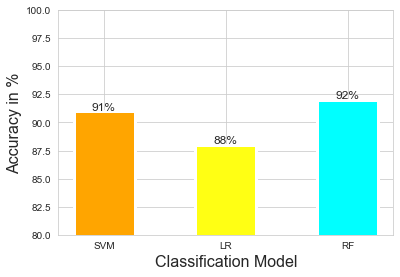

In [43]:
#plot accuracy graph
import matplotlib.pyplot as plt
import seaborn as sns
 
# Create bars
barWidth = 0.5
bars1 = [91]
bars2 = [88]
bars3 = [92]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1]
r2 = [2]
r3 = [3]
r4 = r1 + r2 + r3
sns.set_style("whitegrid")

# Create barplot
plt.bar(r1, bars1, width = barWidth, color = "#FFA500", lw = 3)
plt.bar(r2, bars2, width = barWidth, color = "#FFFF14", lw = 3)
plt.bar(r3, bars3, width = barWidth, color = "#00FFFF", lw = 3)
plt.ylim(80, 100)
# plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth + 0.5 for r in range(len(r4))], ['SVM', 'LR', 'RF'])

plt.ylabel("Accuracy in %", fontsize = 16)
plt.xlabel("Classification Model", fontsize = 16)
# Create labels
label = ['91%', '88%', '92%']
 
# Text on the top of each bar
for i in range(len(r4)):
    plt.text(x = r4[i] - 0.1 , y = bars4[i]+0.1, s = label[i], size = 12)

# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic

plt.savefig('accuracy_with_feature_selection.png',bbox_inches='tight')
plt.show()

In [44]:
#make cm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,5), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Note that due to returning the created figure object, when this funciton is called in a
    notebook the figure willl be printed twice. To prevent this, either append ; to your
    function call, or modify the function by commenting out the return expression.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    plt.tight_layout()
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)
#     plt.savefig("rf_confusion_matrix.png", bbox_inches='tight')
    # Note that due to returning the created figure object, when this funciton is called in a notebook
    # the figure willl be printed twice. To prevent this, either append ; to your function call, or
    # modify the function by commenting out this return expression.
    return fig

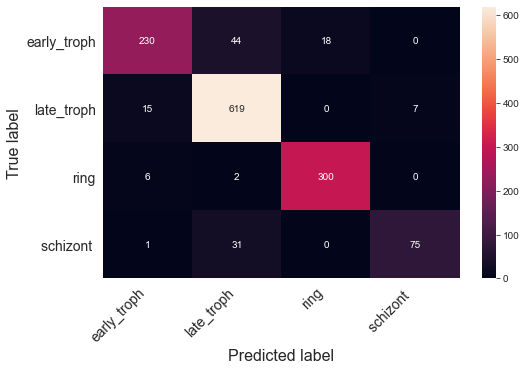

In [50]:
cm = confusion_matrix(Y_test, y_pred)
print_confusion_matrix(cm, ["early_troph", "late_troph", "ring",  "schizont "])
plt.savefig("svm_confusion_matrix.png", bbox_inches='tight')

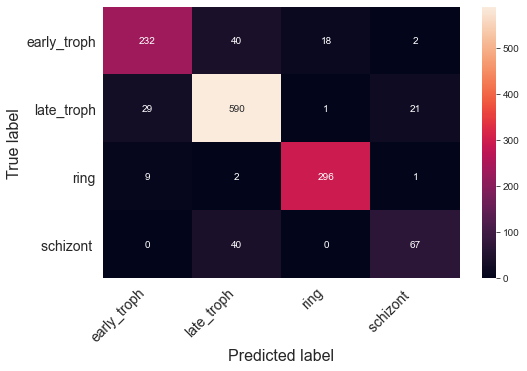

In [51]:
cm1 = confusion_matrix(Y_test, y_pred_log)
print_confusion_matrix(cm1, ["early_troph", "late_troph", "ring",  "schizont "])
plt.savefig("lr_confusion_matrix.png", bbox_inches='tight')

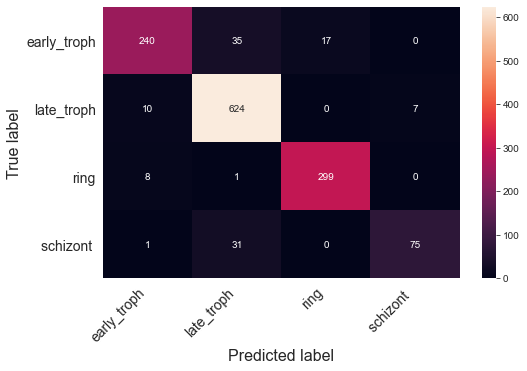

In [52]:
cm2 = confusion_matrix(Y_test, y_pred_RF)
print_confusion_matrix(cm2, ["early_troph", "late_troph", "ring",  "schizont "])
plt.savefig("rf_confusion_matrix.png", bbox_inches='tight')

In [63]:
#calc MI
def computeMI_K(true_label,pred_label,uniform=False):
    #each element of confusion matrix represents the posterior or conditional probability of 
    #predicting a class y' given the true category y - p(y'|y)
    true_value_list = np.unique(true_label) #y
    pred_value_list = np.unique(pred_label) #y'
    
    rows = len(true_value_list)
    cols = len(pred_value_list)
#     print(rows, cols)
    i_rows = np.arange(0,rows)
    j_cols = np.arange(0,cols)
    p_joint = np.empty((rows,cols))
    prior_py = (1/float(rows))*np.ones((rows)) #assume uniform prior
#     print(prior_py)
    mutual_info_sum = 0

    #compute confusion matrix
    cm = confusion_matrix(true_label,pred_label)
#     print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
#     print(cm)
    #calculate joint probability p(y,y')-  equal to product of prior p(y) and 
    #conditional probability p(y'|y) (i.e. elements of confusion matrix)
    p_joint = prior_py[0]*cm
    if uniform is False:
        prior_py = np.array([ len(true_label[true_label==val])/float(len(true_label)) for val in true_value_list ]) #P(y)
        for i in i_rows:
            for j in j_cols:
                p_joint[i,j] = prior_py[i]*cm[i,j]

#     print(prior_py[0])
#     print(p_joint)
    
    
    #calculate p(y') -i.e. sum joint probability p(y,y') over true label y
    p_y_p = np.sum(p_joint,axis=0)
#     print(p_y_p)

    #calculate mutual information
    MI = 0.0
    for i in i_rows:
        for j in j_cols:
            if p_joint[i,j] == 0:
                continue
            if p_y_p[j] ==0: 
                continue
            MI    += p_joint[i,j]*np.log2((p_joint[i,j])/(prior_py[i]*p_y_p[j]))
    return MI

In [64]:
print("svm mI is ",computeMI_K(Y_test, y_pred))
print("lr mI is ",computeMI_K(Y_test, y_pred_log))
print("rf mI is ",computeMI_K(Y_test, y_pred_RF))

svm mI is  1.2439731492688855
lr mI is  1.1399756968456538
rf mI is  1.2883375339057674


In [14]:
str = 'PF3D7-1401400 PF3D7-1404000 PF3D7-1404500 PF3D7-1406900 PF3D7-1409800 PF3D7-1411400 PF3D7-1415600 PF3D7-1417000 PF3D7-1420700 PF3D7-1421900 PF3D7-1422000 PF3D7-1422700 PF3D7-1426300 PF3D7-1426900 PF3D7-1429700 PF3D7-1430300 PF3D7-1432900 PF3D7-1433500 PF3D7-1433700 PF3D7-1437700 PF3D7-1439600 PF3D7-1441000 PF3D7-1441100 PF3D7-1441700 PF3D7-1444000 PF3D7-1445500 PF3D7-1447500 PF3D7-1448800 PF3D7-1449000 PF3D7-1449200 PF3D7-1451100 PF3D7-1451600 PF3D7-1455500 PF3D7-1455700 PF3D7-1455800 PF3D7-1457100 PF3D7-1460000 PF3D7-1460900.2 PF3D7-1462200 PF3D7-1464200 PF3D7-1464900 PF3D7-1465400 PF3D7-1466300 PF3D7-1467700 PF3D7-1468000 PF3D7-1468400 PF3D7-1469100 PF3D7-1470300 PF3D7-1470700 PF3D7-1471200 PF3D7-1475300 PF3D7-1476100 PF3D7-1301500 PF3D7-1301600 PF3D7-1301700 PF3D7-1304000 PF3D7-1305000 PF3D7-1305300 PF3D7-1306000 PF3D7-1307400 PF3D7-1307600 PF3D7-1307800 PF3D7-1308500 PF3D7-1309700 PF3D7-1309800 PF3D7-1311200 PF3D7-1311400 PF3D7-1311900 PF3D7-1312500 PF3D7-1315700 PF3D7-1317300 PF3D7-1318700 PF3D7-1321800 PF3D7-1322100 PF3D7-1322900 PF3D7-1323600 PF3D7-1324900 PF3D7-1328100 PF3D7-1328900 PF3D7-1329600 PF3D7-1334000 PF3D7-1335700 PF3D7-1336800 PF3D7-1337800 PF3D7-1340300 PF3D7-1343000 PF3D7-1343400 PF3D7-1345500 PF3D7-1348600 PF3D7-1348800 PF3D7-1354000 PF3D7-1354900 PF3D7-1355300 PF3D7-1356000 PF3D7-1356300 PF3D7-1358200 PF3D7-1359900 PF3D7-1362100 PF3D7-1362200 PF3D7-1365000 PF3D7-1365300 PF3D7-1366600 PF3D7-1367300 PF3D7-1367900 PF3D7-1200610 PF3D7-1202000 PF3D7-1206800 PF3D7-1209100 PF3D7-1210900 PF3D7-1211000 PF3D7-1213700 PF3D7-1215500 PF3D7-1216700 PF3D7-1218700 PF3D7-1221700 PF3D7-1221900 PF3D7-1225700 PF3D7-1226100 PF3D7-1227000 PF3D7-1228600 PF3D7-1231100 PF3D7-1231700 PF3D7-1232400 PF3D7-1233400 PF3D7-1238100 PF3D7-1238500 PF3D7-1240100 PF3D7-1241900 PF3D7-1242000 PF3D7-1247000.1 PF3D7-1248200 PF3D7-1251100 PF3D7-1252100 PF3D7-1102500 PF3D7-1103100 PF3D7-1103500 PF3D7-1104800 PF3D7-1105000 PF3D7-1105100 PF3D7-1106900 PF3D7-1111900 PF3D7-1112400 PF3D7-1113900 PF3D7-1114100.2 PF3D7-1116700 PF3D7-1117300 PF3D7-1120700 PF3D7-1121200 PF3D7-1121400 PF3D7-1124300 PF3D7-1125500 PF3D7-1125700 PF3D7-1126900 PF3D7-1127900 PF3D7-1128500 PF3D7-1129300 PF3D7-1131100 PF3D7-1131600 PF3D7-1138400 PF3D7-1138600 PF3D7-1140800 PF3D7-1143000 PF3D7-1145400 PF3D7-1146000 PF3D7-1148900 PF3D7-1149000 PF3D7-1149100.1 PF3D7-1000200 PF3D7-1001400 PF3D7-1004600 PF3D7-1007000 PF3D7-1010200 PF3D7-1010800 PF3D7-1010900 PF3D7-1012400 PF3D7-1013400 PF3D7-1014000 PF3D7-1015200.2 PF3D7-1021400 PF3D7-1024300 PF3D7-1026400 PF3D7-1027200 PF3D7-1028600 PF3D7-1028800 PF3D7-1029300 PF3D7-1029400 PF3D7-1029700 PF3D7-1029900 PF3D7-1030700 PF3D7-1034500 PF3D7-1038900 PF3D7-0906000 PF3D7-0906800 PF3D7-0907400 PF3D7-0908900 PF3D7-0912400 PF3D7-0912800 PF3D7-0913900 PF3D7-0914500 PF3D7-0915500 PF3D7-0915600 PF3D7-0919900 PF3D7-0920500 PF3D7-0923100 PF3D7-0925700 PF3D7-0925900 PF3D7-0926700 PF3D7-0926800 PF3D7-0929200 PF3D7-0929900 PF3D7-0930300 PF3D7-0931900 PF3D7-0933800 PF3D7-0933900 PF3D7-0935200 PF3D7-0935700 PF3D7-0935900 PF3D7-0936800 PF3D7-0800600 PF3D7-0802100 PF3D7-0802200 PF3D7-0802300 PF3D7-0803300 PF3D7-0803400 PF3D7-0803600.1 PF3D7-0805200 PF3D7-0805400 PF3D7-0806200 PF3D7-0807300 PF3D7-0807500 PF3D7-0808400 PF3D7-0811500 PF3D7-0813300 PF3D7-0815700 PF3D7-0819000 PF3D7-0821700 PF3D7-0822900 PF3D7-0823900 PF3D7-0825600 PF3D7-0828800 PF3D7-0829000 PF3D7-0701600 PF3D7-0707300 PF3D7-0710700 PF3D7-0714200 PF3D7-0715000 PF3D7-0715400 PF3D7-0717000 PF3D7-0718600 PF3D7-0719400 PF3D7-0719700 PF3D7-0720800 PF3D7-0722600 PF3D7-0727200 PF3D7-0727700 PF3D7-0730000 PF3D7-0731500 PF3D7-0601900 PF3D7-0602800 PF3D7-0603200 PF3D7-0604200 PF3D7-0605600 PF3D7-0606600 PF3D7-0608300 PF3D7-0608800 PF3D7-0609100 PF3D7-0609300 PF3D7-0612200 PF3D7-0613800 PF3D7-0614800 PF3D7-0615600 PF3D7-0616100 PF3D7-0616800 PF3D7-0617400 PF3D7-0617800 PF3D7-0618100 PF3D7-0621900 PF3D7-0622200 PF3D7-0622400 PF3D7-0623300 PF3D7-0623500 PF3D7-0624400 PF3D7-0626200 PF3D7-0626300 PF3D7-0627200 PF3D7-0627700 PF3D7-0629400 PF3D7-0631100 PF3D7-0500800 PF3D7-0501500 PF3D7-0501800 PF3D7-0505300 PF3D7-0506900 PF3D7-0508600 PF3D7-0508900 PF3D7-0510700 PF3D7-0511700 PF3D7-0512200 PF3D7-0514000 PF3D7-0515200 PF3D7-0519100 PF3D7-0520200 PF3D7-0520400 PF3D7-0523800 PF3D7-0525000 PF3D7-0528500 PF3D7-0529900 PF3D7-0530700 PF3D7-0532100 PF3D7-0532500 PF3D7-0532600 PF3D7-0404500 PF3D7-0405600 PF3D7-0406700 PF3D7-0407400 PF3D7-0411900 PF3D7-0412100 PF3D7-0412700 PF3D7-0413300 PF3D7-0414100 PF3D7-0416700 PF3D7-0417700 PF3D7-0419600 PF3D7-0421100 PF3D7-0424000 PF3D7-0424600 PF3D7-0301000 PF3D7-0301900 PF3D7-0302200 PF3D7-0303100 PF3D7-0303400 PF3D7-0303600 PF3D7-0303900 PF3D7-0304400.1 PF3D7-0304700 PF3D7-0305200 PF3D7-0305400 PF3D7-0306200 PF3D7-0306900 PF3D7-0308600 PF3D7-0308800 PF3D7-0309600 PF3D7-0312400 PF3D7-0313400 PF3D7-0315500 PF3D7-0315600 PF3D7-0315700 PF3D7-0316200 PF3D7-0317600 PF3D7-0318900 PF3D7-0322800 PF3D7-0323300 PF3D7-0324100 PF3D7-0202000 PF3D7-0202500 PF3D7-0205400 PF3D7-0205700.2 PF3D7-0206900.1 PF3D7-0208900 PF3D7-0210300 PF3D7-0210500 PF3D7-0212700 PF3D7-0212800 PF3D7-0217400 PF3D7-0217700 PF3D7-0217800 PF3D7-0219300 PF3D7-0102600 PF3D7-0104200 PF3D7-0105900 PF3D7-0106500 PF3D7-0106600 PF3D7-0107200 PF3D7-0107800 PF3D7-0107900 PF3D7-0109850 PF3D7-0110900 PF3D7-0113200'
# print(str[0], str[len(str) -1])
temp = ""
arr = []
for s in range(0, len(str)):    
    if(str[s] != " "):
        temp += str[s]
    elif(str[s] == " "):
        arr.append(temp)
        temp = ""
        
arr.append(temp)
# print(len(arr))
# print(arr[122])
print(arr)
# print(x[arr])
selected = x[arr]
print(selected)

['PF3D7-1401400', 'PF3D7-1404000', 'PF3D7-1404500', 'PF3D7-1406900', 'PF3D7-1409800', 'PF3D7-1411400', 'PF3D7-1415600', 'PF3D7-1417000', 'PF3D7-1420700', 'PF3D7-1421900', 'PF3D7-1422000', 'PF3D7-1422700', 'PF3D7-1426300', 'PF3D7-1426900', 'PF3D7-1429700', 'PF3D7-1430300', 'PF3D7-1432900', 'PF3D7-1433500', 'PF3D7-1433700', 'PF3D7-1437700', 'PF3D7-1439600', 'PF3D7-1441000', 'PF3D7-1441100', 'PF3D7-1441700', 'PF3D7-1444000', 'PF3D7-1445500', 'PF3D7-1447500', 'PF3D7-1448800', 'PF3D7-1449000', 'PF3D7-1449200', 'PF3D7-1451100', 'PF3D7-1451600', 'PF3D7-1455500', 'PF3D7-1455700', 'PF3D7-1455800', 'PF3D7-1457100', 'PF3D7-1460000', 'PF3D7-1460900.2', 'PF3D7-1462200', 'PF3D7-1464200', 'PF3D7-1464900', 'PF3D7-1465400', 'PF3D7-1466300', 'PF3D7-1467700', 'PF3D7-1468000', 'PF3D7-1468400', 'PF3D7-1469100', 'PF3D7-1470300', 'PF3D7-1470700', 'PF3D7-1471200', 'PF3D7-1475300', 'PF3D7-1476100', 'PF3D7-1301500', 'PF3D7-1301600', 'PF3D7-1301700', 'PF3D7-1304000', 'PF3D7-1305000', 'PF3D7-1305300', 'PF3D7-1306

In [15]:
heatmap_data = []
for (columnName, columnData) in selected.iteritems():
    temp = []
    li = columnData.values.tolist()
    c1 = 0
    c2 = 0
    c3 = 0
    c4 = 0
    for i in range(len(li)):
        if(Y[i] == "early_troph" ):
            c1 = c1 + li[i]
        elif(Y[i] == "late_troph" ):
            c2 = c2 + li[i]
        elif(Y[i] == "ring" ):
            c3 = c3 + li[i]
        elif(Y[i] == "schizont" ):
            c4 = c4 + li[i]
    error = 0
    a1 = (c1/ 1461) + error
    a2 = (c2/ 3201) + error
    a3 = (c3/ 1538) + error
    a4 = (c4/  537) + error
    temp.append(a1)
    temp.append(a2)
    temp.append(a3)
    temp.append(a4)
#     temp.append(math.log10(a1))
#     temp.append(math.log10(a2))
#     temp.append(math.log10(a3))
#     temp.append(math.log10(a4))
    heatmap_data.append(temp)


print(heatmap_data)
min_value = 1000
rows = len(heatmap_data)
cols = len(heatmap_data[0])
for i in range(rows):
    for j in range(cols):
        if(heatmap_data[i][j]!= 0 and heatmap_data[i][j] < min_value):
            min_value = heatmap_data[i][j]

print(min_value)
for i in range(rows):
    for j in range(cols):
        heatmap_data[i][j] = math.log10(heatmap_data[i][j] + min_value)
print(heatmap_data)

[[0.42035298600183574, 0.18207448258684739, 2.617445527756855, 0.08580199402873169], [0.11205014653050428, 0.29533315181136294, 0.030984422015447897, 0.11297442023283193], [0.11843725862824254, 0.15242683016581626, 0.08528180452440082, 0.04089196574221187], [0.023039986243195778, 0.02194174294159405, 0.0, 0.07395365606789386], [0.0342044664173602, 0.04865018057734007, 0.007145168242912517, 0.012601444734052832], [0.24106870440732825, 0.6109449834833315, 0.006639567819538094, 0.2756663786206932], [0.1644090675613629, 0.4571669573233222, 0.04701920974458079, 0.2090735051221012], [0.0014599854398965161, 0.00506911831970378, 0.0, 0.009858962954375418], [1.6070052716171503, 1.2463764999797247, 1.873510779891597, 0.48450739901932594], [0.004322576894670623, 0.04119120029454095, 0.0027620302404677112, 0.07006714974959793], [0.08017820211266326, 0.14715105198989847, 0.0, 0.10724805569605063], [0.33822573362725644, 0.5072551212207248, 0.18510412757840247, 0.28540692172721843], [0.0, 0.010234462

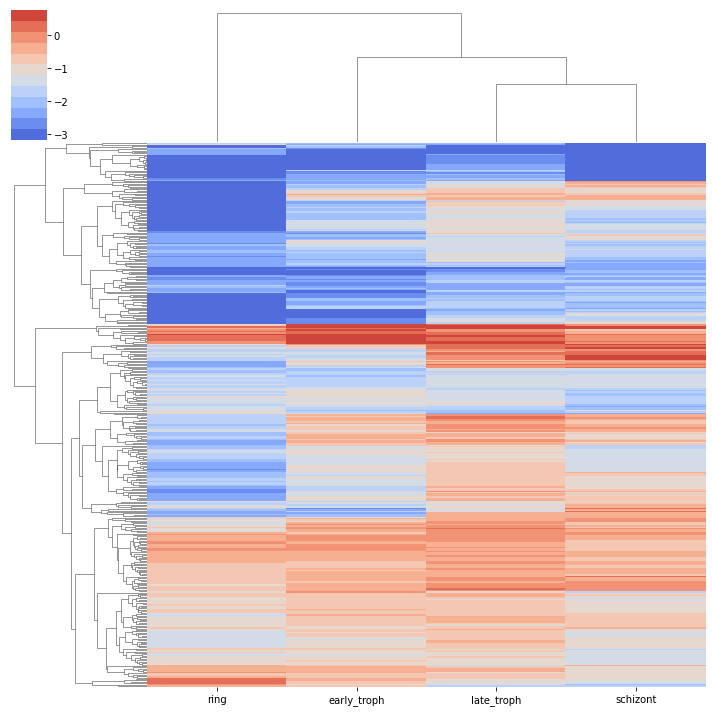

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(20,15))
arr_heat = np.array(heatmap_data)
# print(arr_heat)
panda_df = pd.DataFrame(data = arr_heat, index = arr, columns = ["early_troph",
                                   "late_troph", "ring", "schizont"])

# print(panda_df)  
c = sns.color_palette("coolwarm", 12)

# sn.color_palette("viridis", as_cmap=True)
# sinplot()
hm = sns.clustermap(data = panda_df, figsize=(10, 10), cmap = c, yticklabels=False)
plt.savefig('heatmap.png',bbox_inches='tight')

# ax = hm.ax_heatmap
# ax.set_ylabel("")
plt.show()


